In [1]:
import matplotlib as m
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas as pd
import geopandas as gpd
import numpy as np
import copy
from scipy import stats
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Summation of the value insde a dictionary
def dictsum(myDict):      
    sum = 0
    for i in myDict: 
        sum = sum + myDict[i] 
    return sum

In [3]:
# We only care about the country sequence
file = open("/mnt/c/Users/Shiyuan Wang/Desktop/comparison/Total_pop.json", "r")
population2 = file.read()
population2 = json.loads(population2)
Countries = list(population2.keys())
# population
file = open("/mnt/c/Users/Shiyuan Wang/Desktop/new_results/Total_pop_newest.json", "r")
population = file.read()
population = json.loads(population)
population = {k: population[k] for k in Countries}

# final demand
file = open("../2_Concentration_Factors/final_demand.json", "r")
final_demand = file.read()
final_demand = json.loads(final_demand)

# total output
file = open("../2_Concentration_Factors/total_output.json", "r")
total_output = file.read()
total_output = json.loads(total_output)

In [4]:
output_capita = {}
for country in population:
    output_capita[country] = total_output[country] / population[country]

In [5]:
demand_capita = {}
for country in population:
    demand_capita[country] = final_demand[country] / population[country]

In [6]:
# total number of deaths caused by country i and happen in country j
file = open("con_mort_tol.json", "r")
con_mort_tol = file.read()
con_mort_tol = json.loads(con_mort_tol)

## Excess mortality rate (per 100k) due to consumption

In [7]:
con_mort_capita = {}
for i in Countries:
    con_mort_capita[i] = {}
    for j in Countries:
        con_mort_capita[i][j] = (con_mort_tol[i][j]/population[j]) * 100000

In [8]:
pd.DataFrame(con_mort_tol).sum(axis = 0)

AFG     5813.271342
ALB     1197.935201
DZA     8171.042151
AND       50.273331
AGO     8565.666872
           ...     
VNM    36106.815292
YEM     4130.688030
ZMB     3111.683736
ZWE     1197.929866
ROW        0.000000
Length: 188, dtype: float64

In [9]:
# Row sum: total deaths happen in that country
con_total = dict(pd.DataFrame(con_mort_tol).sum(axis = 1))

In [10]:
# Col sum: total deaths caused by that country
con_caused = dict(pd.DataFrame(con_mort_tol).sum(axis = 0))

In [11]:
con_mort_tol['ROW']['CHN'],con_mort_tol['TWN']['ROW']

(0.0, 11.494037151040429)

In [12]:
pd.DataFrame(con_mort_tol)

,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,ABW,AUS,...,USA,URY,UZB,VUT,VEN,VNM,YEM,ZMB,ZWE,ROW
AFG,1064.082706,1.148061,8.780425,0.084104,2.003919,0.042099,4.503851,3.663754,0.067202,6.871084,...,107.101693,0.352540,603.524580,0.062510,22.238167,2.810641,6.699015,0.622434,0.231962,0.0
ALB,0.462054,296.823023,13.993787,0.100447,1.345454,0.056652,3.055129,0.267260,0.085753,3.191676,...,42.838654,0.313698,1.649583,0.092720,14.695857,1.170747,0.555845,0.228966,0.131011,0.0
DZA,0.375285,1.792641,2151.155936,0.352196,5.389620,0.032241,10.278330,0.237872,0.055937,8.523131,...,269.562687,0.644828,1.896832,0.028125,45.021079,2.913699,1.981799,0.418874,0.266688,0.0
AND,0.000900,0.002023,0.165643,0.144809,0.014862,0.000126,0.026876,0.000544,0.000185,0.019676,...,0.429829,0.002062,0.004656,0.000107,0.116018,0.005431,0.003393,0.000991,0.000680,0.0
AGO,1.225542,1.338307,16.971002,0.404090,6451.286882,0.159943,19.520027,0.530154,0.246448,20.111750,...,905.385017,1.423540,5.707006,0.237327,92.114787,10.757237,2.718174,182.240186,19.819906,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,13.500106,3.503009,134.166540,1.372183,62.976329,0.746414,137.825586,3.008277,1.868384,673.242522,...,2226.142299,6.415376,44.837123,1.320354,667.684766,26024.371742,33.767976,5.912966,3.837138,0.0
YEM,2.431152,0.706489,6.960472,0.067381,1.909331,0.024777,4.449968,0.957951,0.040034,8.409373,...,113.516282,0.268869,4.043720,0.035916,22.965725,2.774301,1313.927281,0.538047,0.208743,0.0
ZMB,0.716058,0.912309,1.965469,0.193087,19.609147,0.120215,2.659839,0.362991,0.200575,4.116035,...,77.758615,0.652727,2.239173,0.206700,7.808674,2.474808,0.758303,1454.805780,55.704314,0.0
ZWE,0.164714,0.145658,1.404906,0.074117,2.769780,0.065966,1.762586,0.081923,0.057211,2.000282,...,19.138260,0.218708,0.761673,0.076631,8.588224,0.738352,0.253870,22.433477,481.919519,0.0


## Fraction of deaths caused by foreign demand and occur in the current country

In [13]:
# deaths happen in that country caused by foreign demand
death_by_allforeigndemand = {} # deaths caused by all foreign demand
death_by_G50foreigndemand = {} # deaths caused by demand from countries where demand/capita is >50% more than demand/capita in current country
death_by_G100foreigndemand = {} # deaths caused by demand from countries where demand/capita is >50% more than demand/capita in current country
for i in Countries:
    death_by_allforeigndemand[i] = 0
    death_by_G50foreigndemand[i] = 0
    death_by_G100foreigndemand[i] = 0
    for j in Countries:
        if i != j:
            death_by_allforeigndemand[i] += con_mort_tol[j][i] # deaths caused by j and happen in i
            
            if demand_capita[j] >= 1.5 * demand_capita[i]:
                death_by_G50foreigndemand[i] += con_mort_tol[j][i]
                
            if demand_capita[j] >= 2 * demand_capita[i]:
                death_by_G100foreigndemand[i] += con_mort_tol[j][i]

In [14]:
death_by_allforeigndemand

{'AFG': 4311.894085352052,
 'ALB': 995.9671346604879,
 'DZA': 2995.984628492177,
 'AND': 7.575881919365889,
 'AGO': 4779.867474477459,
 'ATG': 0.0,
 'ARG': 3396.7523162395078,
 'ARM': 1445.0798818503117,
 'ABW': 1.7525818853002082,
 'AUS': 1750.065288442411,
 'AUT': 2067.5369708189937,
 'AZE': 4379.921858962338,
 'BHS': 31.609110427097207,
 'BHR': 397.3350943634642,
 'BGD': 49246.27682357457,
 'BRB': 16.63745968750726,
 'BLR': 3230.5790202030435,
 'BEL': 3422.6168420053914,
 'BLZ': 7.419381423708588,
 'BEN': 1053.691090120422,
 'BMU': 3.8440585388370527,
 'BTN': 308.0707865355506,
 'BOL': 1026.5356333164984,
 'BIH': 1464.7757349379312,
 'BWA': 364.01729165863475,
 'BRA': 19506.092493849155,
 'VGB': 0.0,
 'BRN': 27.810175675195687,
 'BGR': 8072.1686698071035,
 'BFA': 803.3406094777696,
 'BDI': 676.6234554049935,
 'KHM': 3741.4468500530024,
 'CMR': 1467.5015057434227,
 'CAN': 4201.61241785452,
 'CPV': 41.486320182156454,
 'CYM': 15.09697726703411,
 'CAF': 315.36956505105974,
 'TCD': 535.

In [15]:
# total deaths happen in that country
con_dom_world = {}
for country in con_mort_tol:
    con_dom_world[country] = {}
    con_dom_world[country]['domestic'] = con_mort_tol[country][country]
    con_dom_world[country]['world'] = con_total[country]
    con_dom_world[country]['OtherPartofWorld'] = con_dom_world[country]['world'] - con_dom_world[country]['domestic']

In [16]:
con_dom_world

{'AFG': {'domestic': 1064.082706287054,
  'world': 5375.976791639105,
  'OtherPartofWorld': 4311.894085352051},
 'ALB': {'domestic': 296.823022835936,
  'world': 1292.7901574964237,
  'OtherPartofWorld': 995.9671346604878},
 'DZA': {'domestic': 2151.1559357022147,
  'world': 5147.140564194392,
  'OtherPartofWorld': 2995.9846284921773},
 'AND': {'domestic': 0.1448093961988105,
  'world': 7.720691315564698,
  'OtherPartofWorld': 7.575881919365888},
 'AGO': {'domestic': 6451.286881864739,
  'world': 11231.1543563422,
  'OtherPartofWorld': 4779.867474477461},
 'ATG': {'domestic': 0.0, 'world': 0.0, 'OtherPartofWorld': 0.0},
 'ARG': {'domestic': 9057.207827758964,
  'world': 12453.96014399847,
  'OtherPartofWorld': 3396.7523162395064},
 'ARM': {'domestic': 156.64990435767365,
  'world': 1601.7297862079854,
  'OtherPartofWorld': 1445.0798818503117},
 'ABW': {'domestic': 0.002985047878752498,
  'world': 1.7555669331789607,
  'OtherPartofWorld': 1.7525818853002082},
 'AUS': {'domestic': 3651.5

In [17]:
# total deaths happen in that country RATIO
allforeign_world = {}
G50foreign_world = {}
G100foreign_world = {}
for country in con_dom_world:
    if con_dom_world[country]['world'] != 0:
        allforeign_world[country] = death_by_allforeigndemand[country] / con_dom_world[country]['world']
        G50foreign_world[country] = death_by_G50foreigndemand[country] / con_dom_world[country]['world']
        G100foreign_world[country] = death_by_G100foreigndemand[country] / con_dom_world[country]['world']
    else:
        allforeign_world[country] = 0
        G50foreign_world[country] = 0
        G100foreign_world[country] = 0   

In [18]:
allforeign_world['CHN'],G50foreign_world['CHN'],G100foreign_world['CHN']

(0.2739544968558075, 0.15167897784261866, 0.14467420987748975)

In [19]:
print(sorted(allforeign_world.items(), key=lambda item: item[1]))

[('ATG', 0), ('VGB', 0), ('FJI', 0), ('GRL', 0), ('ISL', 0), ('WSM', 0), ('VUT', 0), ('VEN', 0.14451029015850217), ('IDN', 0.151075242525994), ('KEN', 0.1912724212756748), ('NGA', 0.1925681591223534), ('ZAF', 0.2072082474724511), ('BRA', 0.2119040812072927), ('PHL', 0.2196580990199856), ('USA', 0.22482815939698592), ('TZA', 0.22659317736225312), ('MDG', 0.25563915640659196), ('ARG', 0.2727447556411519), ('CHN', 0.2739544968558075), ('PER', 0.2826812409396256), ('GTM', 0.28565587447806445), ('URY', 0.28990188323103844), ('COL', 0.2980713575761723), ('CHL', 0.2999380014423987), ('MEX', 0.3085987815949854), ('DOM', 0.31455979005084084), ('GUY', 0.3159284362281472), ('TUR', 0.32075040805833294), ('AUS', 0.3239907186362378), ('ECU', 0.3298717924270128), ('PRY', 0.3360092009192846), ('CUB', 0.3457672876069391), ('EGY', 0.3488633261587502), ('SOM', 0.356351740580988), ('LKA', 0.35759965472749233), ('LBR', 0.3668486045973596), ('JPN', 0.36689315012712537), ('GBR', 0.3776394039209846), ('CIV', 

In [20]:
sum_pop = 0
for i in allforeign_world:
    if allforeign_world[i] > 0.5:
        sum_pop+=population[i]

In [21]:
sum_pop,dictsum(population)

(2157973454.641355, 7967442481.268361)

In [22]:
print(sorted(G50foreign_world.items(), key=lambda item: item[1]))

[('ATG', 0), ('VGB', 0), ('FJI', 0), ('GRL', 0), ('ISL', 0), ('LIE', 0.0), ('WSM', 0), ('SMR', 0.0), ('VUT', 0), ('MAC', 0.00010935891974189512), ('SGP', 0.00011009648937681474), ('USA', 0.00012691650343438912), ('MCO', 0.00015688376850299688), ('NOR', 0.0002307591958826507), ('ABW', 0.00024829386610056146), ('AUS', 0.000260493979669526), ('LUX', 0.0003313248845450337), ('SWE', 0.00043635516391400946), ('CHE', 0.00048620847555687656), ('DNK', 0.0004953654443794804), ('CYM', 0.0005038462621804516), ('NZL', 0.0005904027720876159), ('BMU', 0.0008089634790282396), ('CAN', 0.0014671398520956526), ('HKG', 0.004856006877683785), ('GUY', 0.008043248985733139), ('GBR', 0.009066435501852137), ('NLD', 0.016252669450681465), ('BEL', 0.01823463953837353), ('FIN', 0.021461085658739817), ('DEU', 0.022596273465408944), ('AUT', 0.03238691217111259), ('KWT', 0.040293764082409464), ('ARE', 0.04448580399784831), ('FRA', 0.053133956826258766), ('ARG', 0.05412185932094306), ('ISR', 0.05578661361443178), ('I

In [23]:
file=open("allforeign_world.json",'w')
json.dump(allforeign_world,file)
file.close()

##  Fraction of deaths caused by consumption in this country that occur in other countries

In [24]:
# deaths caused by this country and happen in foreign country
death_allforeign = {} # deaths caused by consumption in this country that occur in ALL other countries
death_L30foreigndemand = {} # deaths caused by consumption in this country that occur in countries with >33% lower demand/capita than the current country
death_L50foreigndemand = {} # deaths caused by consumption in this country that occur in countries with >50% lower demand/capita than the current country

for i in Countries:
    death_allforeign[i] = 0
    death_L30foreigndemand[i] = 0
    death_L50foreigndemand[i] = 0
    for j in Countries:
        if i != j:
            death_allforeign[i] += con_mort_tol[i][j] # deaths caused by i and happen in j
            
            if demand_capita[j] <= 0.7 * demand_capita[i]:
                death_L30foreigndemand[i] += con_mort_tol[i][j]
                
            if demand_capita[j] <= 0.5 * demand_capita[i]:
                death_L50foreigndemand[i] += con_mort_tol[i][j]

In [25]:
# total deaths caused by that country
con_cause_dom_world = {}
for country in con_mort_tol:
    con_cause_dom_world[country] = {}
    con_cause_dom_world[country]['domestic'] = con_mort_tol[country][country]
    con_cause_dom_world[country]['world'] = con_caused[country]
    con_cause_dom_world[country]['OtherPartofWorld'] = con_cause_dom_world[country]['world'] - con_cause_dom_world[country]['domestic']

In [26]:
# total deaths caused by that country RATIO
cause_allforeign_world = {}
cause_L30foreign_world = {}
cause_L50foreign_world = {}
for country in con_cause_dom_world:
    if con_cause_dom_world[country]['world'] != 0:
        cause_allforeign_world[country] = death_allforeign[country] / con_cause_dom_world[country]['world']
        cause_L30foreign_world[country] = death_L30foreigndemand[country] / con_cause_dom_world[country]['world']
        cause_L50foreign_world[country] = death_L50foreigndemand[country] / con_cause_dom_world[country]['world']
    else:
        cause_allforeign_world[country] = 0
        cause_L30foreign_world[country] = 0
        cause_L50foreign_world[country] = 0

In [27]:
count = 0
for i in cause_allforeign_world.values():
    if i >0.5:
        count+=1

In [28]:
count/188

0.7553191489361702

In [29]:
print(sorted(cause_allforeign_world.items(), key=lambda item: item[1]))

[('ROW', 0), ('IDN', 0.08767391381116066), ('BRA', 0.11553594626941043), ('CHN', 0.11898675021956127), ('HTI', 0.14466175595144845), ('GTM', 0.18545332459909272), ('PER', 0.18962629262901248), ('NGA', 0.19505685794690705), ('COL', 0.19959140685022417), ('ECU', 0.21881058851804003), ('ZAF', 0.22299529407066665), ('IND', 0.23202388482434314), ('MEX', 0.23752450361562957), ('AGO', 0.24684359338455894), ('COD', 0.2548949923821466), ('PHL', 0.25561445108284847), ('VNM', 0.27923934772127257), ('TZA', 0.2820074579165492), ('MDG', 0.3047283860513251), ('CMR', 0.3114647946201611), ('EGY', 0.3178102557955603), ('JAM', 0.33032319289652795), ('SLV', 0.350632150809636), ('LKA', 0.36307292582543876), ('MAR', 0.3713646757006582), ('CHL', 0.3722272442176167), ('UGA', 0.3761975039615023), ('ARG', 0.38439239078181314), ('PRK', 0.3845236250533439), ('CUB', 0.38568205700544783), ('GAB', 0.3894037137069451), ('BOL', 0.3920081720852249), ('RUS', 0.3975636970425755), ('UKR', 0.39945901144021795), ('KEN', 0.4

------

In [30]:
df_shp = gpd.read_file('/mnt/c/Users/Shiyuan Wang/Desktop/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')

In [31]:
df_shp["allforeign_world"] = np.nan
df_shp["G50foreign_world"] = np.nan
df_shp["G100foreign_world"] = np.nan
df_shp["cause_allforeign_world"] = np.nan
df_shp["cause_L30foreign_world"] = np.nan
df_shp["cause_L50foreign_world"] = np.nan

In [32]:
# keys: the aggregate region in gtap; values: the seperate countries within each region
Gtap_regions = {'PRI':['PRI'], 
               'XCB':['AIA','ATG','ABW','BHS','BRB','VGB','CYM','CUB','DMA','GRD','HTI','MSR','KNA','LCA','VCT','TCA','VIR'],
               'XCF':['CAF','TCD','COG','GNQ','GAB','STP'],
               'XEC':['BDI','COM','DJI','ERI','SYC','SOM','SDN'], #'SDN' is changed from 'SUD':South Sudan
               'XER':['AND','BIH','GIB','GGY','VAT','IMN','JEY','MKD','MCO','MNE','SMR','SRB'],
               'XNA':['BMU','GRL','SPM'],
               'XNF':['DZA','LBY','SAH'], # 'SAH' is changed from 'ESH': Western Sahara
               'XOC':['ASM','COK','FJI','PYF','GUM','KIR','MHL','FSM','NRU','NCL','NIU','MNP','PLW','PNG','PCN','WSM','SLB',
                      'TON','TUV','VUT','WLF'], #'TKL' Tokelau is removed since it's counted as New Zealand
               'XSE':['MMR','TLS'],
               'XSM':['FLK','GUY','SUR'],
               'XWF':['CPV','GMB','GNB','LBR','MLI','MRT','NER','SHN','SLE'],
               'XAC':['AGO','COD'],
               'XEA':['PRK','MAC'],
               'XSA':['AFG','BTN','MDV'],
               'XSC':['LSO','SWZ'],
               'XSU':['TJK','TKM','UZB'],
               'XWS':['IRQ','LBN','PSX','YEM','SYR'],
               'XEF':['ISL','LIE']}
                #XTW

In [33]:
for i in df_shp['ADM0_A3']:
    if i in Countries:

SyntaxError: unexpected EOF while parsing (<ipython-input-33-75388921230f>, line 2)

In [34]:
for i in df_shp['ADM0_A3']:
    if i in Countries:
        df_shp.loc[df_shp['ADM0_A3'] == i,"allforeign_world"] = allforeign_world[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"G50foreign_world"] = G50foreign_world[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"G100foreign_world"] = G100foreign_world[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"cause_allforeign_world"] = cause_allforeign_world[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"cause_L30foreign_world"] = cause_L30foreign_world[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"cause_L50foreign_world"] = cause_L50foreign_world[i] 
 

    if i == 'PSX':
        df_shp.loc[df_shp['ADM0_A3'] == i,"allforeign_world"] = allforeign_world['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"G50foreign_world"] = G50foreign_world['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"G100foreign_world"] = G100foreign_world['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"cause_allforeign_world"] = cause_allforeign_world['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"cause_L30foreign_world"] = cause_L30foreign_world['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"cause_L50foreign_world"] = cause_L50foreign_world['PSE'] 

        
    if i == 'SDN':
        df_shp.loc[df_shp['ADM0_A3'] == i,"allforeign_world"] = allforeign_world['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"G50foreign_world"] = G50foreign_world['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"G100foreign_world"] = G100foreign_world['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"cause_allforeign_world"] = cause_allforeign_world['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"cause_L30foreign_world"] = cause_L30foreign_world['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"cause_L50foreign_world"] = cause_L50foreign_world['SUD'] 

    if i == 'ROW':
        continue

In [35]:
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,9)
mpl.style.use('ggplot')

In [36]:
# Shift cmap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

### number of deaths caused by foreign demand / numer of deaths caused by foreign and domestic demand

In [37]:
# mid = stats.percentileofscore(list(con_ratio_dom_other.values()), 1)/max(list(con_ratio_dom_other.values()))/100
# mid

## add plots for higher demand/capita, not necessarily 50%higher

## 1. deaths caused by all foreign demand

In [38]:
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib import pyplot as plt
import cartopy

In [39]:
shifted_cmap = shiftedColorMap(matplotlib.cm.PiYG, midpoint=0.5, name='shifted').reversed()

(-17005833.33052523, 17005833.33052523, -8625154.6651, 8625154.6651)

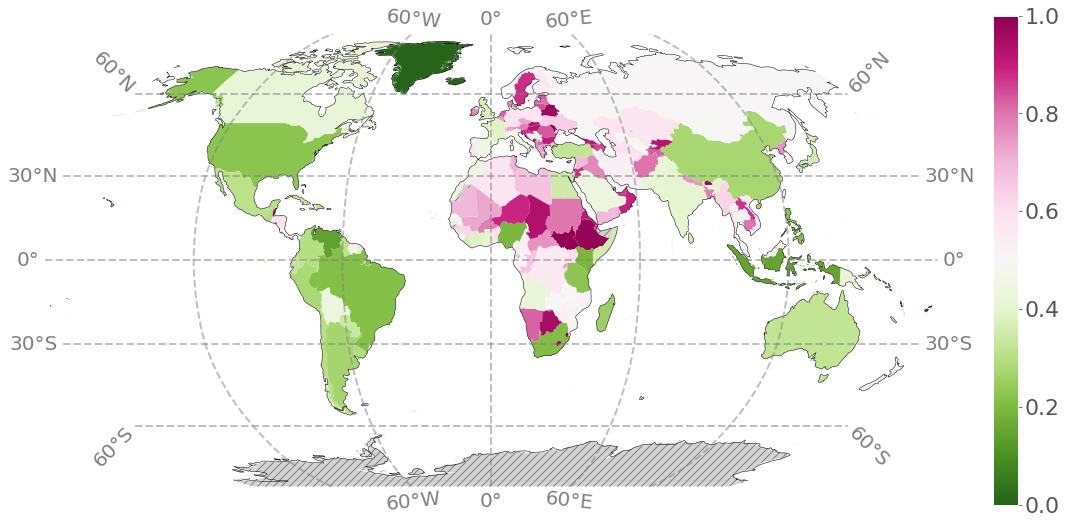

In [40]:
fig, ax = plt.subplots(1, 1)

ax = plt.axes(projection=ccrs.Robinson())

robinson = ccrs.Robinson().proj4_init

df_shp.to_crs(robinson).plot(linewidths=0,column='allforeign_world',ax=ax, vmin=0,vmax=max(list(allforeign_world.values())),legend=True,cmap = shifted_cmap,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
# plt.title('Fraction of deaths caused by foreign demand',fontsize=24)

colourbar = ax.get_figure().get_axes()[1]
yticks = ['0.0','0.2','0.4','0.6','0.8','1.0']

colourbar.set_yticklabels(yticks,fontsize=22)

ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 20,'color':'gray'}
gl.ylabel_style = {'size': 20,'color':'gray'}

ax.axis('off')

In [41]:
len(df_shp[df_shp['allforeign_world'] >= 0.5])/len(df_shp[df_shp['allforeign_world'] >= 0])

0.6737967914438503

In [42]:
len(df_shp[df_shp['allforeign_world'] >= 0])

187

In [43]:
df_shp[df_shp['allforeign_world'] <= 0.0001].sort_values(by='allforeign_world')

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_TR,NAME_VI,NAME_ZH,geometry,allforeign_world,G50foreign_world,G100foreign_world,cause_allforeign_world,cause_L30foreign_world,cause_L50foreign_world
174,Admin-0 country,0,3,Denmark,DN1,1,2,Country,Greenland,GRL,...,Grönland,Greenland,格陵兰,"MULTIPOLYGON (((-40.87580 65.09650, -40.85367 ...",0.0,0.0,0.0,1.0,0.869861,0.857954
175,Admin-0 country,5,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,Fiji,Fiji,斐濟,"MULTIPOLYGON (((-180.00000 -16.16961, -180.000...",0.0,0.0,0.0,1.0,0.909000,0.906919
188,Admin-0 country,0,3,Iceland,ISL,0,2,Sovereign country,Iceland,ISL,...,İzlanda,Iceland,冰岛,"MULTIPOLYGON (((-14.56363 66.38451, -14.61075 ...",0.0,0.0,0.0,1.0,0.830885,0.806220
203,Admin-0 country,3,6,Antigua and Barbuda,ATG,0,2,Sovereign country,Antigua and Barbuda,ATG,...,Antigua ve Barbuda,Antigua và Barbuda,安提瓜和巴布达,"MULTIPOLYGON (((-61.88362 17.04902, -61.87922 ...",0.0,0.0,0.0,1.0,0.762632,0.601595
209,Admin-0 country,3,6,United Kingdom,GB1,1,2,Dependency,British Virgin Islands,VGB,...,Britanya Virjin Adaları,Quần đảo Virgin thuộc Anh,英屬維爾京群島,"MULTIPOLYGON (((-64.63512 18.40550, -64.64367 ...",0.0,0.0,0.0,1.0,0.423707,0.357485
232,Admin-0 country,3,4,Samoa,WSM,0,2,Sovereign country,Samoa,WSM,...,Samoa,Samoa,萨摩亚,"MULTIPOLYGON (((-172.20104 -13.59254, -172.197...",0.0,0.0,0.0,1.0,0.420034,0.334134
240,Admin-0 country,5,4,Vanuatu,VUT,0,2,Sovereign country,Vanuatu,VUT,...,Vanuatu,Vanuatu,萬那杜,"MULTIPOLYGON (((169.84034 -20.14080, 169.86052...",0.0,0.0,0.0,1.0,0.249658,0.182602


In [81]:
df_shp[df_shp['CONTINENT'] == 'Oceania'][df_shp['allforeign_world'] >= 0]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_TR,NAME_VI,NAME_ZH,geometry,allforeign_world,G50foreign_world,G100foreign_world,cause_allforeign_world,cause_L30foreign_world,cause_L50foreign_world
159,Admin-0 country,0,2,Papua New Guinea,PNG,0,2,Sovereign country,Papua New Guinea,PNG,...,Papua Yeni Gine,Papua New Guinea,巴布亚新几内亚,"MULTIPOLYGON (((140.97446 -2.60052, 140.98732 ...",0.424981,0.394821,0.375652,0.928205,0.064795,0.049858
173,Admin-0 country,0,2,Australia,AU1,1,2,Country,Australia,AUS,...,Avustralya,Úc,澳大利亚,"MULTIPOLYGON (((131.53590 -31.60556, 131.34555...",0.323991,0.000260,0.000126,0.747808,0.730971,0.700304
175,Admin-0 country,5,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,Fiji,Fiji,斐濟,"MULTIPOLYGON (((-180.00000 -16.16961, -180.000...",0.000000,0.000000,0.000000,1.000000,0.909000,0.906919
176,Admin-0 country,6,2,New Zealand,NZ1,1,2,Country,New Zealand,NZL,...,Yeni Zelanda,New Zealand,新西兰,"MULTIPOLYGON (((166.13697 -50.86435, 166.20525...",0.472291,0.000590,0.000590,0.827785,0.764732,0.718454
177,Admin-0 country,6,3,France,FR1,1,2,Dependency,New Caledonia,NCL,...,Yeni Kaledonya,Nouvelle-Calédonie,新喀里多尼亞,"MULTIPOLYGON (((163.98512 -20.04762, 163.98609...",0.648869,0.087340,0.006851,0.817422,0.706480,0.693664
190,Admin-0 country,6,4,France,FR1,1,2,Dependency,French Polynesia,PYF,...,Fransız Polinezyası,Polynésie thuộc Pháp,法屬玻里尼西亞,"MULTIPOLYGON (((-136.16576 -22.02435, -136.175...",0.628435,0.502140,0.484603,0.980477,0.836316,0.796361
232,Admin-0 country,3,4,Samoa,WSM,0,2,Sovereign country,Samoa,WSM,...,Samoa,Samoa,萨摩亚,"MULTIPOLYGON (((-172.20104 -13.59254, -172.197...",0.000000,0.000000,0.000000,1.000000,0.420034,0.334134
240,Admin-0 country,5,4,Vanuatu,VUT,0,2,Sovereign country,Vanuatu,VUT,...,Vanuatu,Vanuatu,萬那杜,"MULTIPOLYGON (((169.84034 -20.14080, 169.86052...",0.000000,0.000000,0.000000,1.000000,0.249658,0.182602


In [44]:
for continent in df_shp['CONTINENT'].unique():
    percent = len(df_shp[df_shp['CONTINENT'] == continent][df_shp['allforeign_world'] >= 0.5])/len(df_shp[df_shp['CONTINENT'] == continent][df_shp['allforeign_world'] >= 0])
    print(continent,percent)

Asia 0.7551020408163265
South America 0.08333333333333333
Africa 0.7142857142857143
Europe 0.8604651162790697
North America 0.5217391304347826
Oceania 0.25


ZeroDivisionError: division by zero

## 2. deaths caused by demand from countries where demand/capita is >50% more than demand/capita in current country

In [ ]:
shifted_cmap = shiftedColorMap(matplotlib.cm.PiYG, midpoint=0.5, name='shifted').reversed()

In [ ]:
fig, ax = plt.subplots(1, 1)

ax = plt.axes(projection=ccrs.Robinson())

robinson = ccrs.Robinson().proj4_init

df_shp.to_crs(robinson).plot(linewidths=0,column='G50foreign_world',ax=ax, vmin=0,vmax=max(list(G50foreign_world.values())),legend=True,cmap = shifted_cmap,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
# plt.title('Fraction of deaths caused by foreign demand',fontsize=24)

colourbar = ax.get_figure().get_axes()[1]
yticks = ['0.0','0.2','0.4','0.6','0.8','1.0']
colourbar.set_yticklabels(yticks,fontsize=22)

ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 20,'color':'gray'}
gl.ylabel_style = {'size': 20,'color':'gray'}
ax.axis('off')

In [78]:
len(df_shp[df_shp['G50foreign_world'] >= 0])

187

In [45]:
for continent in df_shp['CONTINENT'].unique():
    percent = len(df_shp[df_shp['CONTINENT'] == continent][df_shp['G50foreign_world'] >= 0.5])/len(df_shp[df_shp['CONTINENT'] == continent][df_shp['G50foreign_world'] >= 0])
    print(continent,percent)

Asia 0.2857142857142857
South America 0.0
Africa 0.30612244897959184
Europe 0.13953488372093023
North America 0.08695652173913043
Oceania 0.125


ZeroDivisionError: division by zero

In [46]:
df_shp[df_shp['G50foreign_world'] >= 0.5][df_shp['CONTINENT'] == 'Africa'].sort_values(by='G50foreign_world')

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_TR,NAME_VI,NAME_ZH,geometry,allforeign_world,G50foreign_world,G100foreign_world,cause_allforeign_world,cause_L30foreign_world,cause_L50foreign_world
32,Admin-0 country,0,2,Democratic Republic of the Congo,COD,0,2,Sovereign country,Democratic Republic of the Congo,COD,...,Demokratik Kongo Cumhuriyeti,Cộng hòa Dân chủ Congo,刚果民主共和国,"MULTIPOLYGON (((18.62639 3.47687, 18.59300 3.7...",0.565046,0.532939,0.504414,0.254895,0.004874,0.000692
149,Admin-0 country,0,6,Togo,TGO,0,2,Sovereign country,Togo,TGO,...,Togo,Togo,多哥,"POLYGON ((-0.16611 11.13498, -0.11506 11.12466...",0.600383,0.546604,0.540826,0.529230,0.007884,0.003760
124,Admin-0 country,0,6,Burundi,BDI,0,2,Sovereign country,Burundi,BDI,...,Burundi,Burundi,蒲隆地,"POLYGON ((30.55460 -2.40063, 30.52148 -2.44228...",0.629499,0.625712,0.606379,0.571030,0.000809,0.000771
98,Admin-0 country,0,3,Mali,MLI,0,2,Sovereign country,Mali,MLI,...,Mali,Mali,马里共和国,"POLYGON ((-12.26413 14.77494, -12.24679 14.767...",0.725625,0.632255,0.592259,0.695410,0.024076,0.012837
86,Admin-0 country,0,3,Sudan,SDN,0,2,Sovereign country,Sudan,SDN,...,Sudan,Sudan,苏丹共和国,"MULTIPOLYGON (((22.86106 10.91915, 22.90023 11...",0.798048,0.633484,0.609704,0.796522,0.242793,0.180505
164,Admin-0 country,0,6,Gambia,GMB,0,2,Sovereign country,Gambia,GMB,...,Gambiya,Gambia,冈比亚,"POLYGON ((-16.75365 13.06501, -16.76887 13.077...",0.689089,0.637627,0.405306,0.543678,0.042765,0.041864
87,Admin-0 country,0,5,Djibouti,DJI,0,2,Sovereign country,Djibouti,DJI,...,Cibuti,Djibouti,吉布提,"POLYGON ((43.24073 11.48786, 43.18881 11.40776...",0.857210,0.639618,0.602350,0.946155,0.174719,0.127196
85,Admin-0 country,0,4,Central African Republic,CAF,0,2,Sovereign country,Central African Republic,CAF,...,Orta Afrika Cumhuriyeti,Cộng hòa Trung Phi,中非共和國,"POLYGON ((22.86106 10.91915, 22.86323 10.89182...",0.757700,0.674359,0.648564,0.527330,0.009984,0.003654
148,Admin-0 country,0,3,Burkina Faso,BFA,0,2,Sovereign country,Burkina Faso,BFA,...,Burkina Faso,Burkina Faso,布吉納法索,"POLYGON ((2.39017 11.89654, 2.35410 11.79985, ...",0.785456,0.716020,0.703726,0.629717,0.026278,0.007139
88,Admin-0 country,0,4,Eritrea,ERI,0,2,Sovereign country,Eritrea,ERI,...,Eritre,Eritrea,厄立特里亚,"MULTIPOLYGON (((43.11769 12.70791, 42.90036 12...",0.907078,0.826761,0.796972,0.897700,0.190738,0.154335


In [47]:
df_shp[df_shp['G50foreign_world'] >= 0.5].sort_values(by='G50foreign_world')

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_TR,NAME_VI,NAME_ZH,geometry,allforeign_world,G50foreign_world,G100foreign_world,cause_allforeign_world,cause_L30foreign_world,cause_L50foreign_world
190,Admin-0 country,6,4,France,FR1,1,2,Dependency,French Polynesia,PYF,...,Fransız Polinezyası,Polynésie thuộc Pháp,法屬玻里尼西亞,"MULTIPOLYGON (((-136.16576 -22.02435, -136.175...",0.628435,0.502140,0.484603,0.980477,0.836316,0.796361
64,Admin-0 country,0,5,Azerbaijan,AZE,0,2,Sovereign country,Azerbaijan,AZE,...,Azerbaycan,Azerbaijan,阿塞拜疆,"MULTIPOLYGON (((44.97946 41.08204, 45.01888 41...",0.854735,0.515238,0.469670,0.692418,0.220504,0.174448
63,Admin-0 country,0,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,...,Arnavutluk,Albania,阿尔巴尼亚,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",0.770401,0.522570,0.450779,0.752221,0.165468,0.111509
32,Admin-0 country,0,2,Democratic Republic of the Congo,COD,0,2,Sovereign country,Democratic Republic of the Congo,COD,...,Demokratik Kongo Cumhuriyeti,Cộng hòa Dân chủ Congo,刚果民主共和国,"MULTIPOLYGON (((18.62639 3.47687, 18.59300 3.7...",0.565046,0.532939,0.504414,0.254895,0.004874,0.000692
135,Admin-0 country,0,5,Honduras,HND,0,2,Sovereign country,Honduras,HND,...,Honduras,Honduras,洪都拉斯,"MULTIPOLYGON (((-89.36162 14.41548, -89.36379 ...",0.595609,0.538249,0.467729,0.592460,0.044736,0.012394
109,Admin-0 country,0,4,Bulgaria,BGR,0,2,Sovereign country,Bulgaria,BGR,...,Bulgaristan,Bulgaria,保加利亚,"POLYGON ((26.33336 41.71304, 26.29491 41.71032...",0.903474,0.538410,0.280045,0.705419,0.177004,0.158346
149,Admin-0 country,0,6,Togo,TGO,0,2,Sovereign country,Togo,TGO,...,Togo,Togo,多哥,"POLYGON ((-0.16611 11.13498, -0.11506 11.12466...",0.600383,0.546604,0.540826,0.529230,0.007884,0.003760
62,Admin-0 country,0,6,Macedonia,MKD,0,2,Sovereign country,Macedonia,MKD,...,Makedonya Cumhuriyeti,Cộng hòa Macedonia,馬其頓共和國,"POLYGON ((20.56715 41.87318, 20.59030 41.85473...",0.824328,0.553856,0.446407,0.762297,0.179315,0.146772
90,Admin-0 country,0,3,Iraq,IRQ,0,2,Sovereign country,Iraq,IRQ,...,Irak,Iraq,伊拉克,"POLYGON ((44.76614 37.14192, 44.75254 37.11314...",0.770786,0.582161,0.538181,0.899524,0.411797,0.377181
68,Admin-0 country,0,4,Laos,LAO,0,2,Sovereign country,Laos,LAO,...,Laos,Lào,老挝,"POLYGON ((102.11866 22.39755, 102.12542 22.383...",0.873041,0.582283,0.551205,0.897385,0.066029,0.030007


In [48]:
df_shp[df_shp['ADM0_A3'] == 'JPN']

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_TR,NAME_VI,NAME_ZH,geometry,allforeign_world,G50foreign_world,G100foreign_world,cause_allforeign_world,cause_L30foreign_world,cause_L50foreign_world
186,Admin-0 country,5,2,Japan,JPN,0,2,Sovereign country,Japan,JPN,...,Japonya,Nhật Bản,日本,"MULTIPOLYGON (((129.78321 31.79963, 129.79086 ...",0.366893,0.064572,0.00006,0.4552,0.426418,0.423012


## 3. deaths caused by demand from countries where demand/capita is >100% more than demand/capita in current country

In [49]:
shifted_cmap = shiftedColorMap(matplotlib.cm.PiYG, midpoint=0.5, name='shifted').reversed()

(-17005833.33052523, 17005833.33052523, -8625154.6651, 8625154.6651)

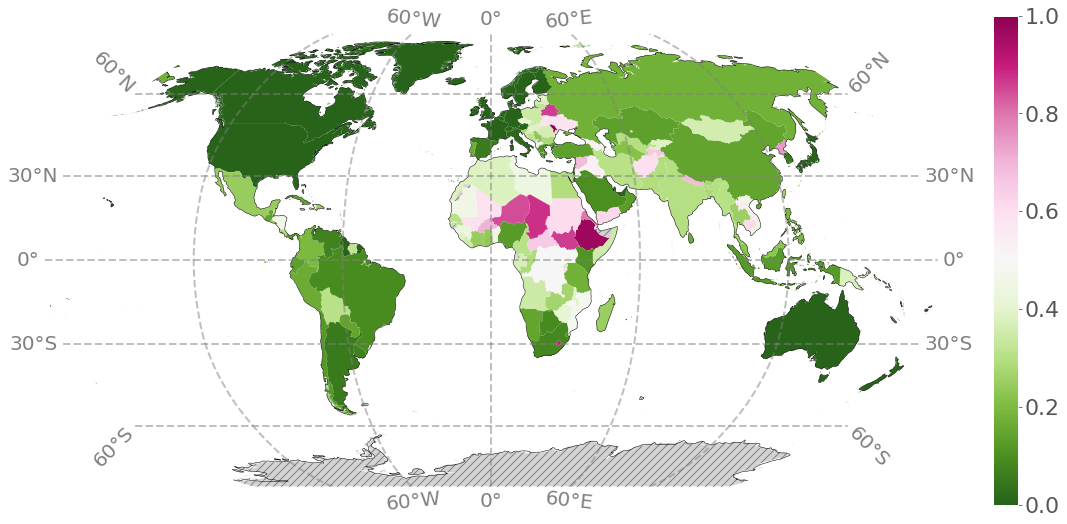

In [50]:
fig, ax = plt.subplots(1, 1)

ax = plt.axes(projection=ccrs.Robinson())

robinson = ccrs.Robinson().proj4_init

df_shp.to_crs(robinson).plot(linewidths=0,column='G100foreign_world',ax=ax, vmin=0,vmax=max(list(G100foreign_world.values())),legend=True,cmap = shifted_cmap,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
# plt.title('Fraction of deaths caused by foreign demand',fontsize=24)
colourbar = ax.get_figure().get_axes()[1]
yticks = ['0.0','0.2','0.4','0.6','0.8','1.0']
colourbar.set_yticklabels(yticks,fontsize=22)
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 20,'color':'gray'}
gl.ylabel_style = {'size': 20,'color':'gray'}
ax.axis('off')

In [51]:
df_shp[df_shp['G50foreign_world'] >= 0.5].sort_values(by='G50foreign_world')

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_TR,NAME_VI,NAME_ZH,geometry,allforeign_world,G50foreign_world,G100foreign_world,cause_allforeign_world,cause_L30foreign_world,cause_L50foreign_world
190,Admin-0 country,6,4,France,FR1,1,2,Dependency,French Polynesia,PYF,...,Fransız Polinezyası,Polynésie thuộc Pháp,法屬玻里尼西亞,"MULTIPOLYGON (((-136.16576 -22.02435, -136.175...",0.628435,0.502140,0.484603,0.980477,0.836316,0.796361
64,Admin-0 country,0,5,Azerbaijan,AZE,0,2,Sovereign country,Azerbaijan,AZE,...,Azerbaycan,Azerbaijan,阿塞拜疆,"MULTIPOLYGON (((44.97946 41.08204, 45.01888 41...",0.854735,0.515238,0.469670,0.692418,0.220504,0.174448
63,Admin-0 country,0,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,...,Arnavutluk,Albania,阿尔巴尼亚,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",0.770401,0.522570,0.450779,0.752221,0.165468,0.111509
32,Admin-0 country,0,2,Democratic Republic of the Congo,COD,0,2,Sovereign country,Democratic Republic of the Congo,COD,...,Demokratik Kongo Cumhuriyeti,Cộng hòa Dân chủ Congo,刚果民主共和国,"MULTIPOLYGON (((18.62639 3.47687, 18.59300 3.7...",0.565046,0.532939,0.504414,0.254895,0.004874,0.000692
135,Admin-0 country,0,5,Honduras,HND,0,2,Sovereign country,Honduras,HND,...,Honduras,Honduras,洪都拉斯,"MULTIPOLYGON (((-89.36162 14.41548, -89.36379 ...",0.595609,0.538249,0.467729,0.592460,0.044736,0.012394
109,Admin-0 country,0,4,Bulgaria,BGR,0,2,Sovereign country,Bulgaria,BGR,...,Bulgaristan,Bulgaria,保加利亚,"POLYGON ((26.33336 41.71304, 26.29491 41.71032...",0.903474,0.538410,0.280045,0.705419,0.177004,0.158346
149,Admin-0 country,0,6,Togo,TGO,0,2,Sovereign country,Togo,TGO,...,Togo,Togo,多哥,"POLYGON ((-0.16611 11.13498, -0.11506 11.12466...",0.600383,0.546604,0.540826,0.529230,0.007884,0.003760
62,Admin-0 country,0,6,Macedonia,MKD,0,2,Sovereign country,Macedonia,MKD,...,Makedonya Cumhuriyeti,Cộng hòa Macedonia,馬其頓共和國,"POLYGON ((20.56715 41.87318, 20.59030 41.85473...",0.824328,0.553856,0.446407,0.762297,0.179315,0.146772
90,Admin-0 country,0,3,Iraq,IRQ,0,2,Sovereign country,Iraq,IRQ,...,Irak,Iraq,伊拉克,"POLYGON ((44.76614 37.14192, 44.75254 37.11314...",0.770786,0.582161,0.538181,0.899524,0.411797,0.377181
68,Admin-0 country,0,4,Laos,LAO,0,2,Sovereign country,Laos,LAO,...,Laos,Lào,老挝,"POLYGON ((102.11866 22.39755, 102.12542 22.383...",0.873041,0.582283,0.551205,0.897385,0.066029,0.030007


In [52]:
df_shp[df_shp['G100foreign_world'] >= 0.5].sort_values(by='G100foreign_world')

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_TR,NAME_VI,NAME_ZH,geometry,allforeign_world,G50foreign_world,G100foreign_world,cause_allforeign_world,cause_L30foreign_world,cause_L50foreign_world
32,Admin-0 country,0,2,Democratic Republic of the Congo,COD,0,2,Sovereign country,Democratic Republic of the Congo,COD,...,Demokratik Kongo Cumhuriyeti,Cộng hòa Dân chủ Congo,刚果民主共和国,"MULTIPOLYGON (((18.62639 3.47687, 18.59300 3.7...",0.565046,0.532939,0.504414,0.254895,0.004874,0.000692
61,Admin-0 country,0,5,Georgia,GEO,0,2,Sovereign country,Georgia,GEO,...,Gürcistan,Gruzia,格鲁吉亚,"POLYGON ((41.55119 42.40646, 41.50017 42.64057...",0.916586,0.630692,0.530718,0.768401,0.223483,0.154573
90,Admin-0 country,0,3,Iraq,IRQ,0,2,Sovereign country,Iraq,IRQ,...,Irak,Iraq,伊拉克,"POLYGON ((44.76614 37.14192, 44.75254 37.11314...",0.770786,0.582161,0.538181,0.899524,0.411797,0.377181
149,Admin-0 country,0,6,Togo,TGO,0,2,Sovereign country,Togo,TGO,...,Togo,Togo,多哥,"POLYGON ((-0.16611 11.13498, -0.11506 11.12466...",0.600383,0.546604,0.540826,0.529230,0.007884,0.003760
68,Admin-0 country,0,4,Laos,LAO,0,2,Sovereign country,Laos,LAO,...,Laos,Lào,老挝,"POLYGON ((102.11866 22.39755, 102.12542 22.383...",0.873041,0.582283,0.551205,0.897385,0.066029,0.030007
70,Admin-0 country,0,6,Armenia,ARM,0,2,Sovereign country,Armenia,ARM,...,Ermenistan,Armenia,亞美尼亞,"MULTIPOLYGON (((45.00240 41.29045, 45.03940 41...",0.902200,0.629012,0.552757,0.806438,0.192612,0.159122
34,Admin-0 country,0,3,Ukraine,UKR,0,2,Sovereign country,Ukraine,UKR,...,Ukrayna,Ukraina,乌克兰,"MULTIPOLYGON (((31.76434 52.10057, 31.82584 52...",0.641637,0.599675,0.588038,0.399459,0.047027,0.021329
98,Admin-0 country,0,3,Mali,MLI,0,2,Sovereign country,Mali,MLI,...,Mali,Mali,马里共和国,"POLYGON ((-12.26413 14.77494, -12.24679 14.767...",0.725625,0.632255,0.592259,0.695410,0.024076,0.012837
87,Admin-0 country,0,5,Djibouti,DJI,0,2,Sovereign country,Djibouti,DJI,...,Cibuti,Djibouti,吉布提,"POLYGON ((43.24073 11.48786, 43.18881 11.40776...",0.857210,0.639618,0.602350,0.946155,0.174719,0.127196
129,Admin-0 country,0,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,...,Afganistan,Afghanistan,阿富汗,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",0.802067,0.786729,0.603461,0.816956,0.002643,0.002104


## 4. deaths caused by consumption in this country that occur in ALL other countries

In [53]:
shifted_cmap = shiftedColorMap(matplotlib.cm.RdYlBu, midpoint=0.5, name='shifted').reversed()

(-17005833.33052523, 17005833.33052523, -8625154.6651, 8625154.6651)

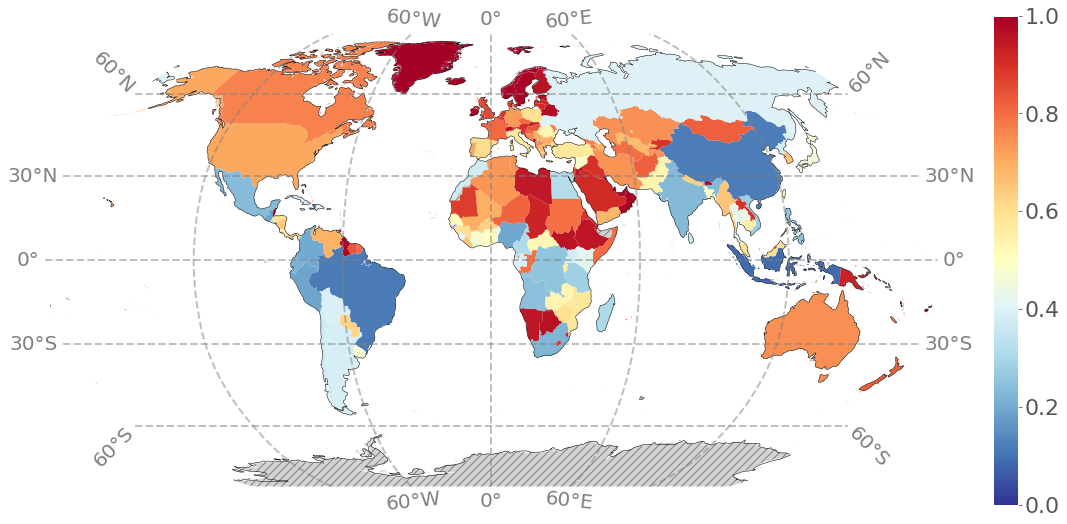

In [54]:
fig, ax = plt.subplots(1, 1)

ax = plt.axes(projection=ccrs.Robinson())

robinson = ccrs.Robinson().proj4_init

df_shp.to_crs(robinson).plot(linewidths=0,column='cause_allforeign_world',ax=ax, vmin=0,vmax=max(list(cause_allforeign_world.values())),legend=True,cmap = shifted_cmap,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
# plt.title('Fraction of deaths caused by foreign demand',fontsize=24)
colourbar = ax.get_figure().get_axes()[1]
yticks = ['0.0','0.2','0.4','0.6','0.8','1.0']
colourbar.set_yticklabels(yticks,fontsize=22)
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 20,'color':'gray'}
gl.ylabel_style = {'size': 20,'color':'gray'}

ax.axis('off')

In [55]:
len(df_shp[df_shp['cause_allforeign_world'] >= 0.5])/len(df_shp[df_shp['cause_allforeign_world'] >= 0])

0.7593582887700535

In [56]:
for continent in df_shp['CONTINENT'].unique():
    percent = len(df_shp[df_shp['CONTINENT'] == continent][df_shp['cause_allforeign_world'] >= 0.5])/len(df_shp[df_shp['CONTINENT'] == continent][df_shp['cause_allforeign_world'] >= 0])
    print(continent,percent)

Asia 0.7551020408163265
South America 0.3333333333333333
Africa 0.673469387755102
Europe 0.9534883720930233
North America 0.6956521739130435
Oceania 1.0


ZeroDivisionError: division by zero

## 5. deaths caused by consumption in this country that occur in countries with >30% lower demand/capita than the current country

In [ ]:
shifted_cmap = shiftedColorMap(matplotlib.cm.RdYlBu, midpoint=0.5, name='shifted').reversed()

In [ ]:
fig, ax = plt.subplots(1, 1)

ax = plt.axes(projection=ccrs.Robinson())

robinson = ccrs.Robinson().proj4_init

df_shp.to_crs(robinson).plot(linewidths=0,column='cause_L30foreign_world',ax=ax, vmin=0,vmax=1,legend=True,cmap = shifted_cmap,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
# plt.title('Fraction of deaths caused by foreign demand',fontsize=24)
colourbar = ax.get_figure().get_axes()[1]
yticks = ['0.0','0.2','0.4','0.6','0.8','1.0']
colourbar.set_yticklabels(yticks,fontsize=22)
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 20,'color':'gray'}
gl.ylabel_style = {'size': 20,'color':'gray'}
ax.axis('off')

In [ ]:
len(df_shp[df_shp['cause_L30foreign_world'] >= 0.5])/len(df_shp[df_shp['cause_L30foreign_world'] >= 0])

In [ ]:
list(df_shp[df_shp['cause_L30foreign_world'] >= 0.5]['ADM0_A3'])

## 6. deaths caused by consumption in this country that occur in countries with >50% lower demand/capita than the current country

In [57]:
shifted_cmap = shiftedColorMap(matplotlib.cm.RdYlBu, midpoint=0.5, name='shifted').reversed()

(-17005833.33052523, 17005833.33052523, -8625154.6651, 8625154.6651)

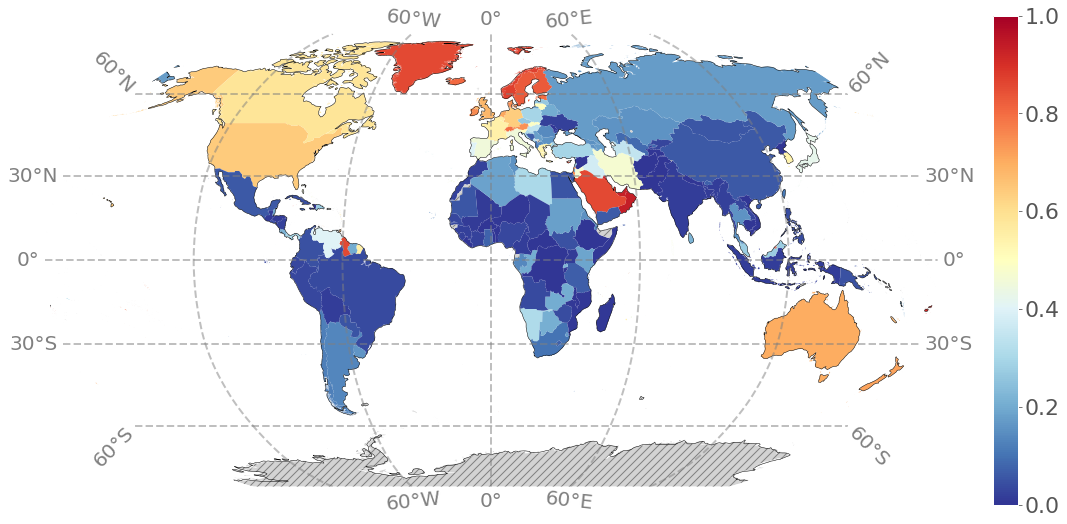

In [58]:
fig, ax = plt.subplots(1, 1)

ax = plt.axes(projection=ccrs.Robinson())

robinson = ccrs.Robinson().proj4_init

df_shp.to_crs(robinson).plot(linewidths=0,column='cause_L50foreign_world',ax=ax, vmin=0,vmax=1,legend=True,cmap = shifted_cmap,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
# plt.title('Fraction of deaths caused by foreign demand',fontsize=24)
colourbar = ax.get_figure().get_axes()[1]
yticks = ['0.0','0.2','0.4','0.6','0.8','1.0']
colourbar.set_yticklabels(yticks,fontsize=22)
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 20,'color':'gray'}
gl.ylabel_style = {'size': 20,'color':'gray'}
ax.axis('off')

In [59]:
len(df_shp[df_shp['cause_L50foreign_world'] >= 0.5])/len(df_shp[df_shp['cause_L50foreign_world'] >= 0])

0.27807486631016043

In [60]:
thirty = list(df_shp[df_shp['cause_L30foreign_world'] >= 0.5]['ADM0_A3'])
fifty = list(df_shp[df_shp['cause_L50foreign_world'] >= 0.5]['ADM0_A3'])
[x for x in thirty if x not in fifty]

['HUN', 'SVK', 'PAN', 'VEN', 'MUS', 'MDV']

## heatmap:  Excess mortality rate (per 100k) due to consumption 188$\times$188 matrix label by regions

In [61]:
con_mort_capita_df = pd.DataFrame(con_mort_capita)
con_mort_capita_df = con_mort_capita_df

In [62]:
con_mort_capita_df

,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,ABW,AUS,...,USA,URY,UZB,VUT,VEN,VNM,YEM,ZMB,ZWE,ROW
AFG,3.481058,0.003756,0.028724,0.000275,0.006556,0.000138,0.014734,0.011986,0.000220,0.022478,...,0.350374,0.001153,1.974380,0.000204,0.072750,0.009195,0.021915,0.002036,0.000759,0.0
ALB,0.015958,10.251327,0.483301,0.003469,0.046468,0.001957,0.105514,0.009230,0.002962,0.110230,...,1.479511,0.010834,0.056971,0.003202,0.507548,0.040434,0.019197,0.007908,0.004525,0.0
DZA,0.000850,0.004061,4.873212,0.000798,0.012210,0.000073,0.023284,0.000539,0.000127,0.019308,...,0.610665,0.001461,0.004297,0.000064,0.101990,0.006601,0.004490,0.000949,0.000604,0.0
AND,0.000830,0.001866,0.152770,0.133556,0.013707,0.000116,0.024788,0.000501,0.000171,0.018147,...,0.396426,0.001902,0.004294,0.000099,0.107002,0.005009,0.003129,0.000914,0.000627,0.0
AGO,0.003333,0.003640,0.046157,0.001099,17.546040,0.000435,0.053090,0.001442,0.000670,0.054699,...,2.462442,0.003872,0.015522,0.000645,0.250531,0.029257,0.007393,0.495652,0.053906,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,0.013643,0.003540,0.135588,0.001387,0.063644,0.000754,0.139286,0.003040,0.001888,0.680377,...,2.249732,0.006483,0.045312,0.001334,0.674760,26.300147,0.034126,0.005976,0.003878,0.0
YEM,0.007990,0.002322,0.022876,0.000221,0.006275,0.000081,0.014625,0.003148,0.000132,0.027638,...,0.373073,0.000884,0.013290,0.000118,0.075477,0.009118,4.318240,0.001768,0.000686,0.0
ZMB,0.003846,0.004900,0.010557,0.001037,0.105330,0.000646,0.014287,0.001950,0.001077,0.022109,...,0.417677,0.003506,0.012028,0.001110,0.041944,0.013293,0.004073,7.814417,0.299213,0.0
ZWE,0.001154,0.001021,0.009846,0.000519,0.019411,0.000462,0.012352,0.000574,0.000401,0.014018,...,0.134122,0.001533,0.005338,0.000537,0.060187,0.005174,0.001779,0.157215,3.377316,0.0


In [63]:
map_continent = pd.read_csv('map_continent.csv')

In [64]:
CONTINENT = list(map_continent['CONTINENT'])

In [65]:
CONTINENT.append('ZZZ')

In [66]:
con_mort_capita_df['CONTINENT'] = CONTINENT

In [67]:
con_mort_capita_df.loc['CONTINENT'] = 'aaa'

In [68]:
for country in Countries:
    con_mort_capita_df.loc['CONTINENT', country] = con_mort_capita_df.loc[country,'CONTINENT']

In [69]:
con_mort_capita_df.sort_values(by = 'CONTINENT', inplace=True)
con_mort_capita_df.sort_values(by = 'CONTINENT',axis = 1, inplace=True)

In [70]:
con_mort_capita_df[con_mort_capita_df['CONTINENT'] == 'aaa']

,SLE,BDI,SEN,CMR,MDG,CPV,STP,CAF,TCD,RWA,...,ECU,BOL,COL,SUR,CHL,BRA,GUY,URY,ROW,CONTINENT
CONTINENT,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,...,South America,South America,South America,South America,South America,South America,South America,South America,ZZZ,aaa


In [71]:
con_mort_capita_df['CONTINENT'].value_counts()

Africa           49
Asia             49
Europe           43
North America    23
South America    12
Oceania           8
Other             3
aaa               1
ZZZ               1
Name: CONTINENT, dtype: int64

## Take log scale

In [72]:
con_mort_capita_df

,SLE,BDI,SEN,CMR,MDG,CPV,STP,CAF,TCD,RWA,...,ECU,BOL,COL,SUR,CHL,BRA,GUY,URY,ROW,CONTINENT
SLE,5.29573,0.00451809,0.124927,0.0166334,0.00531595,0.010267,0.00130767,0.00387342,0.0094882,0.0104381,...,0.0048766,0.00347598,0.0105859,0.00196069,0.00929417,0.0224545,0.0065939,0.00514695,0,Africa
BDI,0.00277534,3.52371,0.00362298,0.00404064,0.021435,0.00103775,0.0010948,0.00185727,0.00769531,0.10211,...,0.00390629,0.0034774,0.00744513,0.00159247,0.00635399,0.0157618,0.00296875,0.00305834,0,Africa
SEN,0.0209612,0.000962816,2.99622,0.0170103,0.00124859,0.00846394,0.000250807,0.00166094,0.00723062,0.00277396,...,0.00137576,0.00103058,0.00456574,0.000379398,0.00274256,0.00977852,0.00235986,0.000994222,0,Africa
CMR,0.00260175,0.00599198,0.00410898,4.42664,0.0063731,0.000673929,0.0026953,0.025599,0.0441638,0.0103416,...,0.00267877,0.00204928,0.00750923,0.000921317,0.00597546,0.0200051,0.00435994,0.00235801,0,Africa
MDG,0.000515092,0.000377618,0.000666622,0.00062792,3.7918,0.000132311,0.000118795,0.000231707,0.00106868,0.00130821,...,0.000616272,0.000496743,0.0020284,0.000163389,0.0015687,0.0051452,0.000844122,0.000521099,0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BRA,0.00255325,0.000943452,0.0061366,0.00388536,0.00205703,0.00149697,7.78668e-05,0.00095394,0.00501808,0.00130195,...,0.0510788,0.0739158,0.101019,0.00169573,0.144527,33.3885,0.0208575,0.100202,0,South America
GUY,0.0048078,0.000434288,0.018368,0.0023733,0.000653204,0.00709815,3.69673e-05,0.000417674,0.00125148,0.000650183,...,0.000571973,0.000424188,0.00304946,0.0572636,0.00123951,0.0112461,1.74425,0.000229445,0,South America
URY,0.00278049,0.00208799,0.00391255,0.00268086,0.00229394,0.0010515,0.000640425,0.0012208,0.00473537,0.00557181,...,0.0306956,0.038886,0.072749,0.0014974,0.363073,2.95852,0.0061022,27.9101,0,South America
ROW,0.0250691,0.00313086,0.18688,0.0277159,0.0598944,0.00728109,0.00169045,0.0048199,0.020477,0.00482448,...,0.0113764,0.0108204,0.0840127,0.00129819,0.0318661,0.1096,0.0787546,0.00388486,0,ZZZ


In [73]:
con_mort_capita_df[con_mort_capita_df['CONTINENT'] == 'Oceania']

,SLE,BDI,SEN,CMR,MDG,CPV,STP,CAF,TCD,RWA,...,ECU,BOL,COL,SUR,CHL,BRA,GUY,URY,ROW,CONTINENT
AUS,0.00121776,0.000657984,0.0020856,0.00164614,0.00166457,0.000202797,0.000113815,0.000628693,0.00426599,0.0013681,...,0.00367349,0.00311047,0.0205691,0.000402204,0.0156477,0.0581618,0.0149059,0.0017894,0,Oceania
VUT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Oceania
NZL,0.00184086,0.000976231,0.00325539,0.00220812,0.00140743,0.000248552,0.000166029,0.0011351,0.00777965,0.00192701,...,0.00593098,0.00573961,0.0381053,0.000617402,0.0227481,0.0699385,0.0328788,0.00242794,0,Oceania
FJI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Oceania
NCL,0.0049415,0.00304757,0.00986424,0.00717756,0.00361911,0.000783259,0.000450743,0.00339127,0.0232405,0.00500833,...,0.0146351,0.0138888,0.104182,0.00134882,0.0408088,0.136592,0.0960761,0.00514906,0,Oceania
PYF,0.0001727,0.000117549,0.000560912,0.000714393,0.000238191,7.32581e-05,2.88124e-05,7.8513e-05,0.000418546,0.000303935,...,0.000507215,0.000221703,0.00141553,0.000104292,0.00151994,0.0032845,0.000265738,0.00023083,0,Oceania
PNG,0.000171928,0.000171092,0.000200228,0.000184049,0.000185854,7.02662e-05,5.53497e-05,0.000101096,0.00037056,0.000313841,...,0.000301327,0.000204164,0.000730111,9.41746e-05,0.000596735,0.00146128,0.000424159,0.000304098,0,Oceania
WSM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Oceania


In [74]:
heatmap_df = pd.DataFrame(con_mort_capita_df.iloc[:-1 , :-1])
heatmap_df = heatmap_df.astype('float')

In [75]:
heatmap_df_log = np.log10(heatmap_df)

In [76]:
heatmap_df_log.loc['FIN']

SLE   -3.264545
BDI   -3.599892
SEN   -3.147015
CMR   -3.113989
MDG   -3.520472
         ...   
CHL   -2.470668
BRA   -1.859165
GUY   -2.945257
URY   -3.268501
ROW        -inf
Name: FIN, Length: 188, dtype: float64

In [73]:
heatmap_df_log

,SLE,BDI,SEN,CMR,MDG,CPV,STP,CAF,TCD,RWA,...,PER,ECU,BOL,COL,SUR,CHL,BRA,GUY,URY,ROW
SLE,0.723926,-2.345045,-0.903345,-1.779020,-2.274419,-1.988554,-2.883501,-2.411905,-2.022816,-1.981380,...,-2.155067,-2.311882,-2.458923,-1.975271,-2.707591,-2.031789,-1.648697,-2.180857,-2.288450,-inf
BDI,-2.556684,0.547000,-2.440934,-2.393550,-1.668877,-2.983906,-2.960667,-2.731125,-2.113774,-0.990933,...,-2.221605,-2.408236,-2.458746,-2.128128,-2.797929,-2.196953,-1.802393,-2.527427,-2.514514,-inf
SEN,-1.678585,-3.016457,0.476574,-1.769288,-2.903581,-2.072427,-3.600660,-2.779646,-2.140824,-2.556899,...,-2.612793,-2.861458,-2.986918,-2.340489,-3.420906,-2.561843,-2.009727,-2.627114,-3.002517,-inf
CMR,-2.584734,-2.222429,-2.386266,0.646074,-2.195649,-3.171386,-2.569392,-1.591777,-1.354933,-1.985414,...,-2.384418,-2.572064,-2.688398,-2.124405,-3.035591,-2.223628,-1.698860,-2.360520,-2.627455,-inf
MDG,-3.288115,-3.422947,-3.176120,-3.202096,0.578846,-3.878405,-3.925201,-3.635060,-2.971153,-2.883322,...,-2.854763,-3.210228,-3.303868,-2.692847,-3.786777,-2.804461,-2.288598,-3.073595,-3.283080,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHL,-2.689378,-2.947163,-2.693791,-2.616782,-2.847608,-3.224672,-3.604951,-3.188064,-2.511476,-2.620700,...,-0.398294,-0.922071,-0.807432,-0.452604,-3.057421,1.485412,-0.127322,-2.573340,-1.370735,-inf
BRA,-2.592907,-3.025280,-2.212072,-2.410569,-2.686760,-2.824786,-4.108648,-3.020479,-2.299462,-2.885405,...,-0.960051,-1.291759,-1.131263,-0.995597,-2.770644,-0.840052,1.523597,-1.680739,-0.999126,-inf
GUY,-2.318054,-3.362222,-1.735939,-2.624647,-3.184951,-2.148855,-4.432182,-3.379162,-2.902578,-3.186965,...,-2.961512,-3.242625,-3.372442,-2.515777,-1.242121,-2.906751,-1.948997,0.241608,-3.639322,-inf
URY,-2.555879,-2.680272,-2.407540,-2.571725,-2.639417,-2.978189,-3.193532,-2.913356,-2.324646,-2.254004,...,-1.187487,-1.512924,-1.410207,-1.138173,-2.824664,-0.440006,0.471074,-2.214514,1.445762,-inf


## Set FJI to -2

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [75]:
for i in heatmap_df_log.index:
    if list(heatmap_df_log.loc[i]) == [-float('inf')] * len(list(heatmap_df_log.loc[i])):
        print(i)
        heatmap_df_log.loc[i] = [-2.5] * len(list(heatmap_df_log.loc[i]))

ISL
VGB
ATG
GRL
VUT
FJI
WSM


In [76]:
heatmap_df_log.loc['ISL']

SLE   -2.5
BDI   -2.5
SEN   -2.5
CMR   -2.5
MDG   -2.5
      ... 
CHL   -2.5
BRA   -2.5
GUY   -2.5
URY   -2.5
ROW   -2.5
Name: ISL, Length: 188, dtype: float64

In [ ]:
cmap=plt.cm.get_cmap('PiYG').reversed()

fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(heatmap_df_log, vmin=-2, vmax=2, square=True)

# colourbar = ax.get_figure().get_axes()[1]

# yticks = ['0','1','2','3','4','>=10']

# colourbar.set_yticklabels(yticks,fontsize=30)


plt.show()

# ticks = np.arange(corr.shape[0]) + 0.5
# ax.set_xticks(ticks)
# ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
# ax.set_yticks(ticks)
# ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

# ax.set_title('correlation matrix')
# plt.tight_layout()
# plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

https://stackoverflow.com/questions/50997662/how-to-plot-heatmap-for-high-dimensional-dataset

In [ ]:
heatmap_df.max()